## Метрики моделей классификации 

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report

from IPython.display import display_html

import sklearn
sklearn.__version__


'1.4.2'

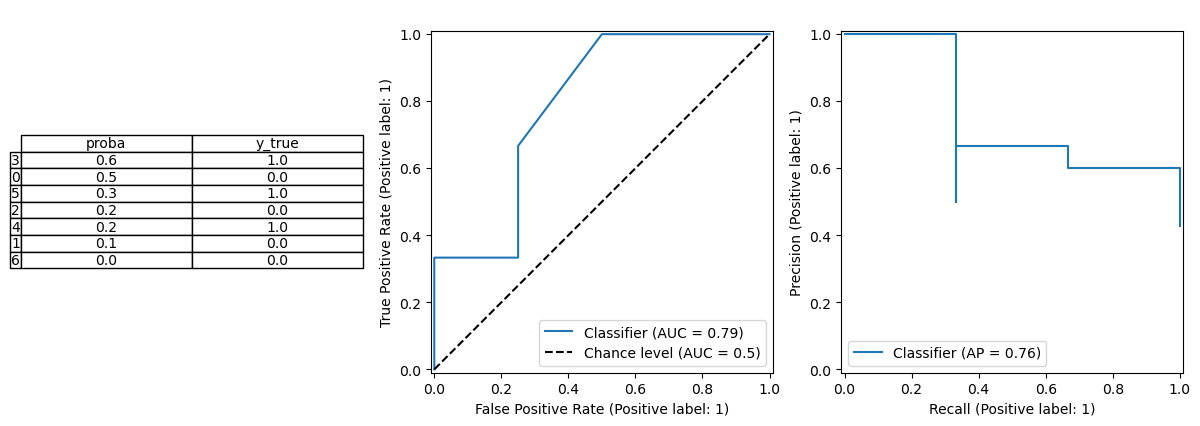

In [507]:
fix, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
res = pd.DataFrame({'proba':[0.5,0.1,0.2,0.6,0.2,0.3,0], 'y_true':[0,0,0,1,1,1,0]})
pd.plotting.table(ax1, res.sort_values(['proba'], ascending=False), 
                 loc='center', cellLoc='center'
                 )
ax1.axis('off')

RocCurveDisplay.from_predictions(res.y_true, res.proba, plot_chance_level=True, ax=ax2);
PrecisionRecallDisplay.from_predictions(res.y_true, res.proba, ax=ax3);


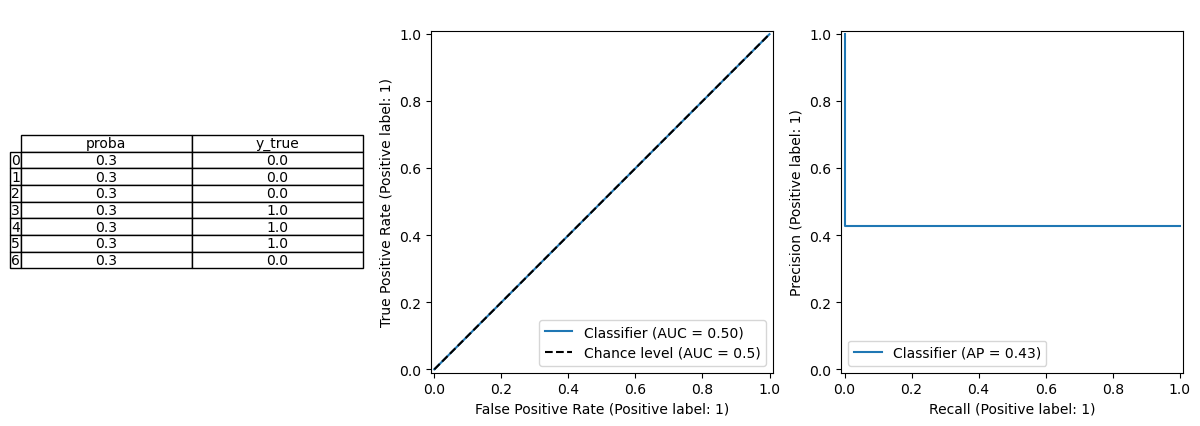

In [509]:
fix, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
res = pd.DataFrame({'proba':[0.3,0.3,0.3,0.3,0.3,0.3,0.3], 'y_true':[0,0,0,1,1,1,0]})
pd.plotting.table(ax1, res.sort_values(['proba'], ascending=False), 
                 loc='center', cellLoc='center'
                 )
ax1.axis('off')
RocCurveDisplay.from_predictions(res.y_true, res.proba, plot_chance_level=True, ax=ax2);
PrecisionRecallDisplay.from_predictions(res.y_true, res.proba, ax=ax3);

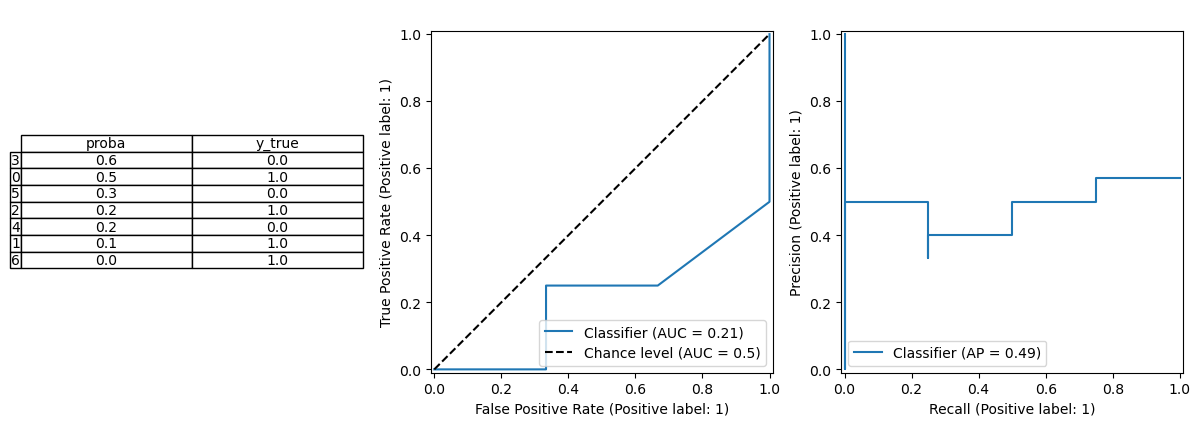

In [511]:
fix, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
res = pd.DataFrame({'proba':[0.5,0.1,0.2,0.6,0.2,0.3,0], 'y_true':[1,1,1,0,0,0,1]})
pd.plotting.table(ax1, res.sort_values(['proba'], ascending=False), 
                 loc='center', cellLoc='center'
                 )
ax1.axis('off')
RocCurveDisplay.from_predictions(res.y_true, res.proba, plot_chance_level=True, ax=ax2);
PrecisionRecallDisplay.from_predictions(res.y_true, res.proba, ax=ax3);

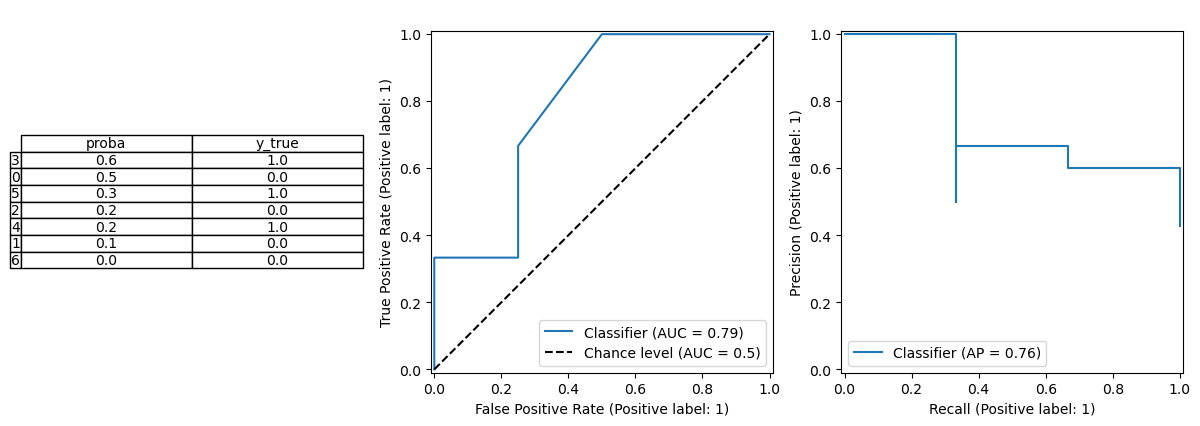

In [512]:
fix, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
res = pd.DataFrame({'proba':[0.5,0.1,0.2,0.6,0.2,0.3,0], 'y_true':[0,0,0,1,1,1,0]})
pd.plotting.table(ax1, res.sort_values(['proba'], ascending=False), 
                 loc='center', cellLoc='center'
                 )
ax1.axis('off')

RocCurveDisplay.from_predictions(res.y_true, res.proba, plot_chance_level=True, ax=ax2);
PrecisionRecallDisplay.from_predictions(res.y_true, res.proba, ax=ax3);


In [514]:
fpr, tpr, thresholds = roc_curve(res.y_true, res.proba)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.25, 0.25, 0.5 , 1.  ]),
 array([0.        , 0.33333333, 0.33333333, 0.66666667, 1.        ,
        1.        ]),
 array([inf, 0.6, 0.5, 0.3, 0.2, 0. ]))

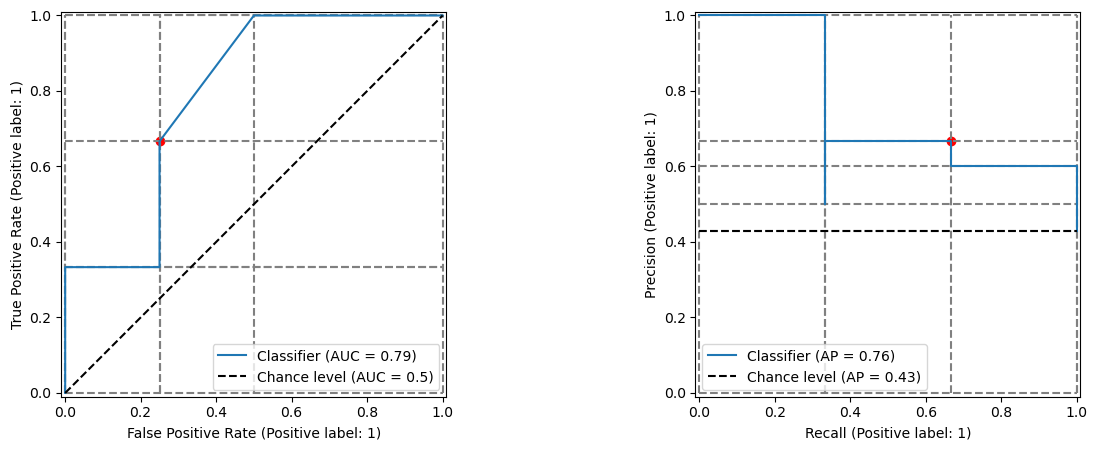

,precision,recall,f1-score,support
0,0.600000,0.750000,0.666667,4.000000
1,0.500000,0.333333,0.400000,3.000000
accuracy,0.571429,0.571429,0.571429,0.571429
macro avg,0.550000,0.541667,0.533333,7.000000
weighted avg,0.557143,0.571429,0.552381,7.000000
,precision,recall,f1-score,support
0,0.750000,0.750000,0.750000,4.000000
1,0.666667,0.666667,0.666667,3.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.708333,0.708333,0.708333,7.000000


In [554]:
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
def prec(y_true, y_proba, ths):
    y_pred_vec = [np.where(y_proba>=i, 1,0) for i in thresholds]
    prec=[]
    for i in y_pred_vec:
        tn, fp, fn, tp = confusion_matrix(res.y_true, i).ravel()
        result = tp/(tp+fp) if (tp+fp) != 0 else 0
        prec = np.append(prec,result)
    return prec
h_prec = prec(res.y_true, res.proba, thresholds)
ax1.vlines(fpr, 0, 1, linestyles = 'dashed', color='grey')
ax1.hlines(tpr, 0, 1, linestyles = 'dashed', color='grey')
ax2.hlines(h_prec, 0, 1, linestyles = 'dashed', color='grey')
ax2.vlines(tpr, 0, 1, linestyles = 'dashed', color='grey')
RocCurveDisplay.from_predictions(res.y_true, res.proba, plot_chance_level=True, ax=ax1);
PrecisionRecallDisplay.from_predictions(res.y_true, res.proba,plot_chance_level=True, ax=ax2);
###############
ths = 0.25
###############
y_predict = np.where(res.proba>=ths, 1,0)
tpr_score = recall_score 
def fpr_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)
    return fpr

tpr_ths = tpr_score(res.y_true, y_predict)
fpr_ths = fpr_score(res.y_true, y_predict)
ax1.scatter(fpr_ths, tpr_ths, color='red')
ax2.scatter(recall_score(res.y_true, y_predict), precision_score(res.y_true, y_predict), color='red')
plt.show()
df1 = pd.DataFrame(classification_report(res.y_true, np.where(res.proba>=0.5, 1,0), output_dict=True)).T
df2 = pd.DataFrame(classification_report(res.y_true, y_predict, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('origin')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('thresholds')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)